In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# allow plots to appear directly in the notebook
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Advertising dataset


In [8]:
df_advertising = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

# # Explore the dataset

In [6]:
df_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df_advertising.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
# shape of the DataFrame
df_advertising.shape

(200, 4)

# Assumption - 1 (Linear Regression )

Linear regression works best when there's a straight-line connection between the features and the target. 


To check this, you can make a scatter plot with the features on one axis and the target on the other.

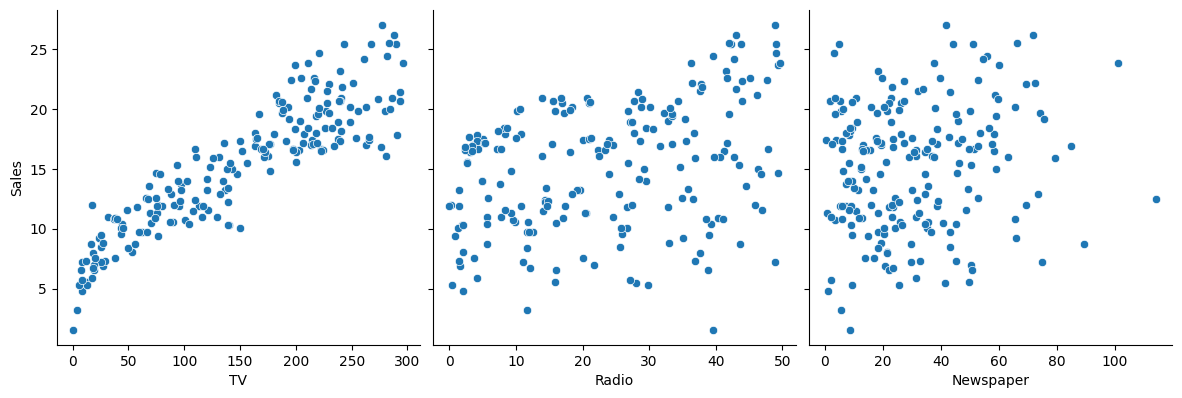

In [12]:
# visualize the relationship between the features and the target using scatterplots
sns.pairplot(df_advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4, aspect = 1)

#  Assumption -  2 (Linear Regression)

In linear regression, it's important that the features (things we use to predict) don't have strong connections with each other. We assume that a change in one feature won't mess up our understanding of how another feature affects the outcome.

If features are too connected (multicollinearity), it's tough for the model to figure out their individual impact on the result. To fix this, we might drop one of the correlated features or combine them into a new one for prediction. 

We can spot these connections by looking at pair plots or heatmaps showing how features are related.

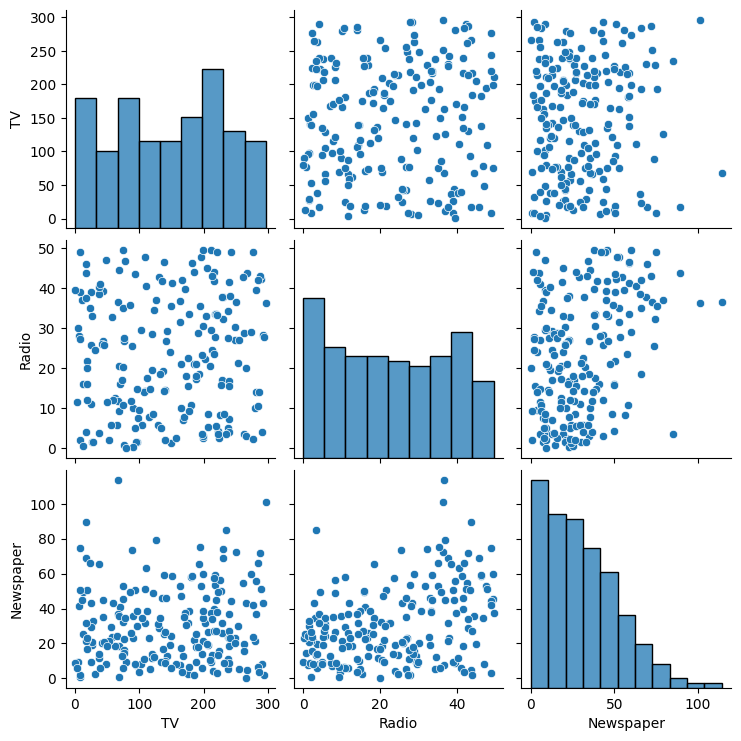

In [13]:
sns.pairplot(df_advertising[['TV','Radio','Newspaper']])

<Axes: >

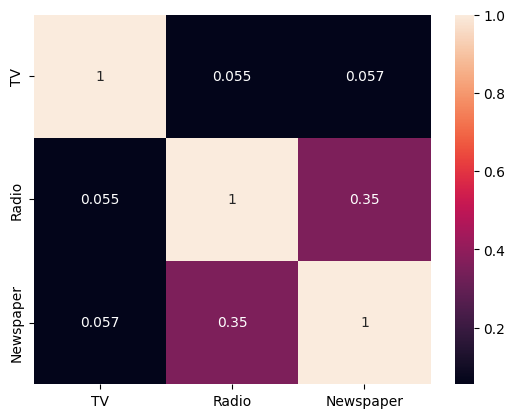

In [14]:
sns.heatmap(df_advertising[['TV','Radio','Newspaper']].corr(), annot = True)

# Assumption - 3 (Linear Regression )

Linear regression assumes that the differences between predicted and actual values (residuals) come from a population with a constant variance, which means that the variability of these differences should be the same across all values of the independent variable. This is called homoscedasticity. 

If there is a clear pattern in the distribution of residuals, it indicates heteroscedasticity, suggesting non-linearity in the data. Linear regression doesn't make assumptions about the distributions of x and y; it focuses on the distribution of the error terms. To account for non-linear effects, polynomial regression, involving adding quadratic and cubic terms to the data, can be used. 

Checking for homoscedasticity can be done by creating a scatter plot of residual values against predicted values.

<Axes: xlabel='TV', ylabel='Sales'>

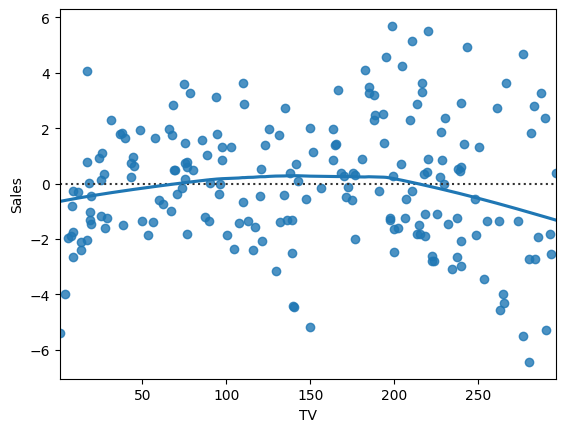

In [15]:
# This function will regress y on x and then draw a scatterplot of the residuals.

sns.residplot(x = df_advertising['TV'], y = df_advertising["Sales"], lowess = True)

# Simple linear regression 

In [16]:
Ststsmodels_model = smf.ols(formula='Sales ~ TV', data = df_advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    6.974821
TV           0.055465
dtype: float64

In [17]:
### SCIKIT-LEARN ###

X = df_advertising[['TV']]
y = df_advertising[["Sales"]]

SkLearn_model = LinearRegression()
SkLearn_result = SkLearn_model.fit(X, y)

# print the coefficients
print(SkLearn_result.intercept_)
print(SkLearn_result.coef_)

[6.97482149]
[[0.05546477]]


In [18]:
# manually calculate the prediction
Sales = 6.97482149 + 0.05546477*50
Sales * 1000

9748.05999

In [19]:
### STATSMODELS ###

X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
Sales = Ststsmodels_result.predict(X_new)
Sales * 1000

0    9748.060012
dtype: float64

In [20]:
### SCIKIT-LEARN ###

# predict for a new observation
Sales = SkLearn_result.predict(np.array(50).reshape(1,-1))
Sales * 1000

array([[9748.06001171]])

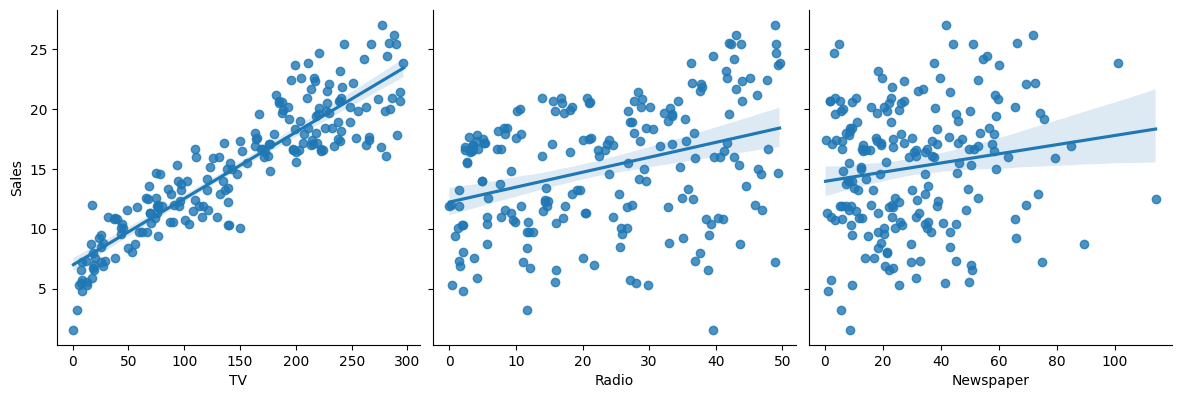

In [21]:
sns.pairplot(df_advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4, aspect = 1, kind='reg')

#  Assumption - 4 (Linear Regression)

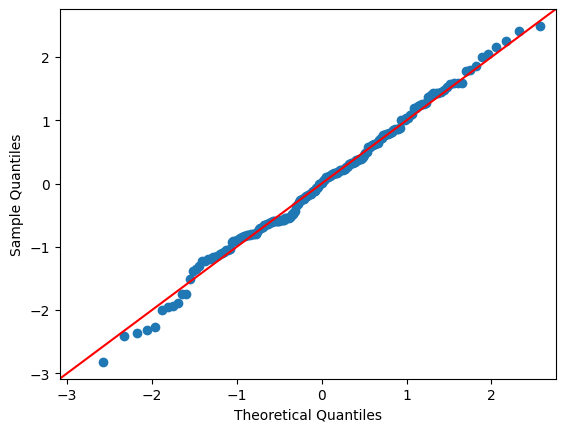

In [22]:
Ststsmodels_residual = Ststsmodels_result.resid
ax = sm.qqplot(Ststsmodels_residual, fit = True, line = "45")

# Confidence in Model

In [23]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
Ststsmodels_result.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [24]:
### STATSMODELS ###

# print the p-values for the model coefficients
Ststsmodels_result.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [25]:
### STATSMODELS ###

# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           7.93e-74
Time:                        05:00:28   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  Assumption - 5 (Linear Regression)

In [26]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
SkLearn_result.score(X, y)

0.8121757029987414

## Multiple Linear Regression

In [27]:
### STATSMODELS ###

# create a fitted model with all three features
Ststsmodels_model = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df_advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [28]:
### SCIKIT-LEARN ###

feature_cols = ['TV', 'Radio', 'Newspaper']
X = df_advertising[feature_cols]
y = df_advertising[["Sales"]]

# instantiate and fit
SkLearn_model = LinearRegression()
SkLearn_result = SkLearn_model.fit(X, y)

# print the coefficients
print(SkLearn_result.intercept_)
print(SkLearn_result.coef_)

[4.62512408]
[[0.05444578 0.10700123 0.00033566]]


In [29]:
### STATSMODELS ###

# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           8.13e-99
Time:                        05:02:29   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Feature Selection

In [30]:
# only include TV and Radio in the model

# instantiate and fit model
Ststsmodels_model = smf.ols(formula='Sales ~ TV + Radio', data=df_advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          2.39e-100
Time:                        05:02:57   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  Model Evaluation Using Train/Test Split

In [31]:
# exclude Newspaper
X = df_advertising[['TV', 'Radio']]
y = df_advertising.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.509248161866739


In [32]:
# include Newspaper
X = df_advertising[['TV', 'Radio', 'Newspaper']]
y = df_advertising.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5096109295725835


# Regularization Techniques

In [35]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit Ridge regression model
ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ridgeReg.predict(X_test_scaled)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.5095495218644939


In [36]:
print(ridgeReg.intercept_)
print(ridgeReg.coef_)

14.896666666666667
[4.78057381 1.54435251 0.01744959]


In [38]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

# Assuming X_train and X_test are your feature matrices, and y_train, y_test are your target vectors

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Ridge regression model
ridgeReg = Ridge(alpha=0.9)

# Fit the model
ridgeReg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ridgeReg.predict(X_test_scaled)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.509306138144203


In [40]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

# Assuming X_train and X_test are your feature matrices

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso model
lassoReg = Lasso(alpha=0.1)
lassoReg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lassoReg.predict(X_test_scaled)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.5238265781754492


In [42]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

# Assuming X_train and X_test are your feature matrices, and y_train, y_test are your target variables

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Ridge regression model
ridgeReg = Ridge(alpha=0.9)
ridgeReg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridgeReg.predict(X_test_scaled)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.509306138144203


In [43]:
print(lassoReg.intercept_)
print(lassoReg.coef_)

14.896666666666667
[4.6888492  1.45684907 0.        ]


## Elastic Net Regression:

In [45]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Assuming you have X_train, X_test, y_train, and y_test defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the ElasticNet model
elasticNetReg = ElasticNet(alpha=1, l1_ratio=0.2)
elasticNetReg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elasticNetReg.predict(X_test)

# Calculate and print the RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.7076692606924946
